<a href="https://colab.research.google.com/github/RishithaPingili/Rishitha_INFO5502_Spring2022/blob/main/lab_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The tenth Lab-assignment (04/28/2022, 50 points in total)

The purpose of this assignment is to practice normal distribution and annotation quality evaluation.

### Question 1 (25 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab10-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [10]:
# your code here
!pip install krippendorff

In [11]:
# your code here

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab10-dataset.csv")
df

,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
...,...,...,...,...,...,...,...
3393,The impact of personality traits on usersÕ inf...,Personality traits drive information seeking d...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3394,The impact of personality traits on usersÕ inf...,Eye-movement parameters can predict these patt...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3395,The impact of personality traits on usersÕ inf...,Prior domain knowledge improves older adultsÕ ...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3396,The impact of personality traits on usersÕ inf...,"Unlike prior results, older adults were outper...",IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0


In [17]:
# label encode the categorical columns data
le = LabelEncoder()

le.fit(df['Annotation1'])

df['le_Annotation1'] = le.transform(df['Annotation1'])
df['le_Annotation2'] = le.transform(df['Annotation2'])
df['le_Annotation3'] = le.transform(df['Annotation3'])

In [18]:
from sklearn.metrics import cohen_kappa_score

s1 = cohen_kappa_score(list(df['le_Annotation1'].values), list(df['le_Annotation2'].values))
s2 = cohen_kappa_score(list(df['le_Annotation2'].values), list(df['le_Annotation3'].values))
s3 = cohen_kappa_score(list(df['le_Annotation1'].values), list(df['le_Annotation3'].values))

# take average of all 3 scores
kappa_score = (s1 + s2 + s3)/3
print("Cohen's kappa score is:", round(kappa_score, 2))

# determining agreement based on cohen kappa score
if kappa_score < 0.0:
    print("Less than chance agreement")

elif ((kappa_score >= 0.01) & (kappa_score <= 0.20)):
    print("Slight agreement")

elif ((kappa_score >= 0.21) and (kappa_score <= 0.40)):
    print("Fair agreement")

elif ((kappa_score >= 0.41) and (kappa_score <= 0.60)):
    print("Moderate agreement")

elif ((kappa_score >= 0.61) and (kappa_score <= 0.80)):
    print("Substantial agreement")

elif ((kappa_score >= 0.81) and (kappa_score <= 0.99)):
    print("Almost perfect agreement")

Cohen's kappa score is: 0.54
Moderate agreement


In [16]:
import krippendorff
d1 = [list(df['le_Annotation1'].values),
        list(df['le_Annotation2'].values),
        list(df['le_Annotation3'].values)]

# fleiss kappa score calculation
fleiss_score = krippendorff.alpha(d1)
print("Fleiss kappa score is:", round(fleiss_score, 2))

Fleiss kappa score is: 0.57


### Question 2 (25 points) 

Normal distribution is the default probability for many real world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD). The parameter used to measure the variability of observations around the mean is called as standard deviation. The probabilities for values occurring near mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Please generate the nromal distribution for the following cases suing Python:

(1) IQ scores (the mean is typically 100, SD = 15)

(2) Marks of students in a class (mean = 60, SD = 20)

(3) Measure of weight (mean = 80 kg, SD = 10)

(4) Measure of blood pressure (mean = 120/80, SD = 20)

(5) Measure of wealth (measurement in money; mean = $50,000 , SD = $100)

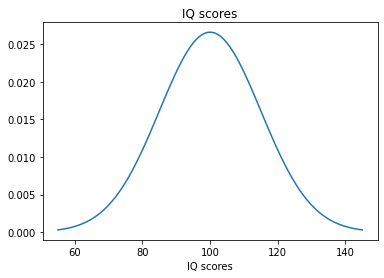

In [2]:
# your code here
#2-1)
%matplotlib inline
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
#generating the normal distribution
mean = 100
sd = 15
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sd))
plt.title("IQ scores")
plt.xlabel("IQ scores")
plt.show()



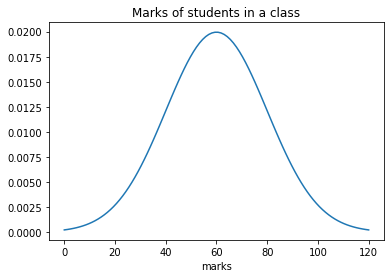

In [6]:
# your code here
#2-2)
%matplotlib inline
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
#generating the normal distribution
mean = 60
sd = 20
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sd))
plt.title("Marks of students in a class")
plt.xlabel("marks")
plt.show()

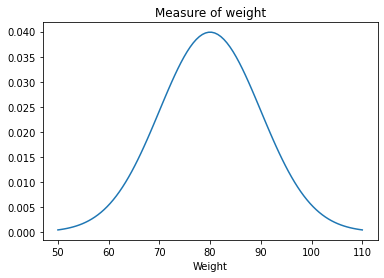

In [7]:
# your code here
#2-3)
%matplotlib inline
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
#generating the normal distribution
mean = 80
sd = 10
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sd))
plt.title("Measure of weight")
plt.xlabel("Weight")
plt.show()


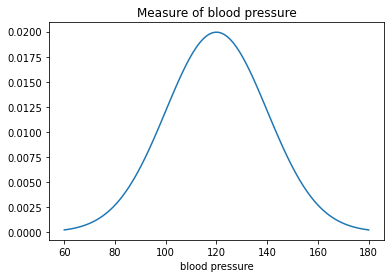

In [8]:
# your code here
#2-4)
%matplotlib inline
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
#generating the normal distribution
mean = 120
sd = 20
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sd))
plt.title("Measure of blood pressure")
plt.xlabel("blood pressure")
plt.show()


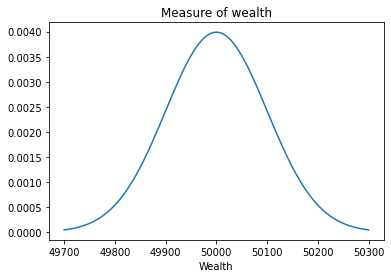

In [9]:
# your code here
#2-5)
%matplotlib inline
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
#generating the normal distribution
mean = 50000
sd = 100
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sd))
plt.title("Measure of wealth")
plt.xlabel("Wealth")
plt.show()